# Notebook for section 3.2

In [1]:
%matplotlib inline
import src.lfw_dataset as lfw
from src.lfw_dataset import LFWDataLoader
from src.siamese import Siamese
from datetime import datetime


# load the paths of the data sets
same_train_paths, diff_train_paths, same_val_paths, diff_val_paths, same_test_paths, diff_test_paths = lfw.load_data()

def try_train(siamese_net, epochs=100, epoch_shuffle=True, verbose=1):
    """
    Try to train the siamese_net model. If success, return train history. Otherwise, return None.
    """
    try:
        print("Training...")
        start_time = datetime.now()
        history = siamese_net.train(same_train_paths, diff_train_paths, same_val_paths, diff_val_paths, epochs=epochs, epoch_shuffle=epoch_shuffle, verbose=verbose)
        end_time = datetime.now()
        print("Training End")
        print('The training took: {}'.format(end_time-start_time))
        return history
    except Exception as e:
        print(f"Got exception while training: {type(e).__name__}")
        return None

Using TensorFlow backend.


Data already exist


## Hani Model (without modifications)

binary_crossentropy
Hani Model:
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 250, 250, 1)  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 250, 250, 1)  0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, 40)           73099       input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 40)           0           sequential_1

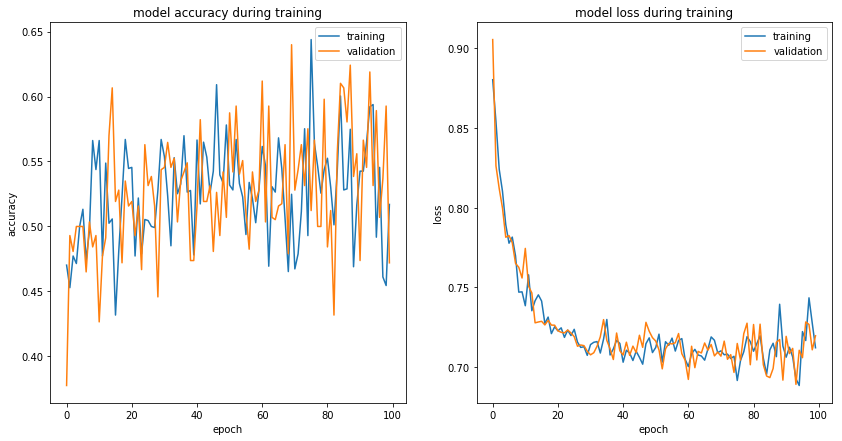

In [2]:
s_net_hani = Siamese()
s_net_hani.build('hani', loss='binary_crossentropy')
print("Hani Model:")
s_net_hani.model.summary()

history_hani = try_train(s_net_hani)
if history_hani:
    s_net_hani.evaluate(history_hani, same_test_paths, diff_test_paths)

## Apply RELU as activation function

binary_crossentropy
Hani Model with ReLU:
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 250, 250, 1)  0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 250, 250, 1)  0                                            
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, 40)           73099       input_3[0][0]                    
                                                                 input_4[0][0]                    
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 40)           0           se

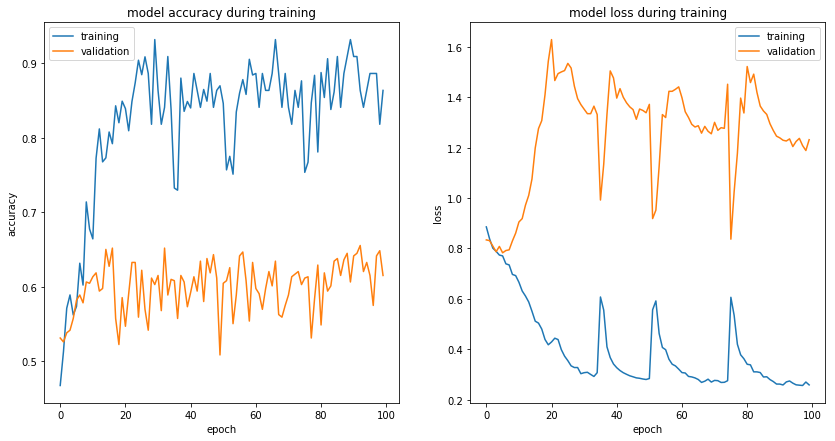

In [3]:
s_net_hani_relu = Siamese()
s_net_hani_relu.build('hani', act='relu', loss='binary_crossentropy')
print("Hani Model with ReLU:")
s_net_hani_relu.model.summary()

history_hani_relu = try_train(s_net_hani_relu)
if history_hani_relu:
    s_net_hani_relu.evaluate(history_hani_relu, same_test_paths, diff_test_paths)

## Apply dropout before the last convolution

binary_crossentropy
Hani Model with dropout=0.5:
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 250, 250, 1)  0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            (None, 250, 250, 1)  0                                            
__________________________________________________________________________________________________
sequential_4 (Sequential)       (None, 40)           73099       input_7[0][0]                    
                                                                 input_8[0][0]                    
__________________________________________________________________________________________________
lambda_4 (Lambda)               (None, 40)           0      

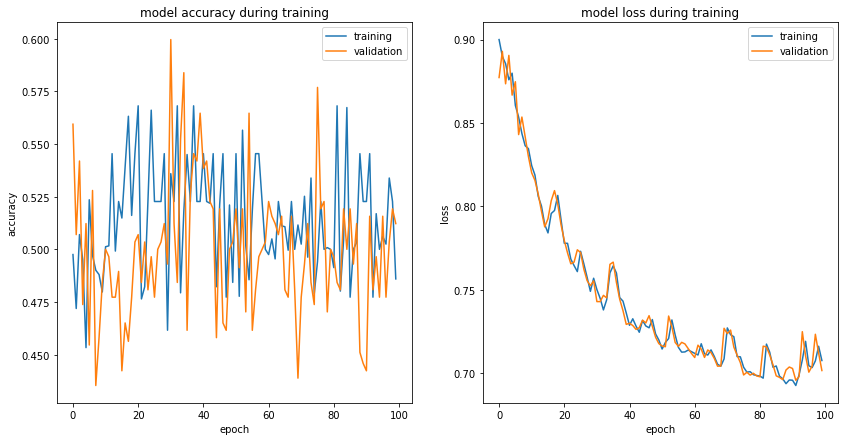

In [5]:
s_net_hani_dropout = Siamese()
s_net_hani_dropout.build('hani', dropout=0.5, loss='binary_crossentropy')
print("Hani Model with dropout=0.5:")
s_net_hani_dropout.model.summary()

history_hani_dropout = try_train(s_net_hani_dropout)
if history_hani_dropout:
    s_net_hani_dropout.evaluate(history_hani_dropout, same_test_paths, diff_test_paths)

## Apply batch normalization between convolutions

binary_crossentropy
Hani Model with batch normalizationד:
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 250, 250, 1)  0                                            
__________________________________________________________________________________________________
input_10 (InputLayer)           (None, 250, 250, 1)  0                                            
__________________________________________________________________________________________________
sequential_5 (Sequential)       (None, 40)           73415       input_9[0][0]                    
                                                                 input_10[0][0]                   
__________________________________________________________________________________________________
lambda_5 (Lambda)               (None, 40)         

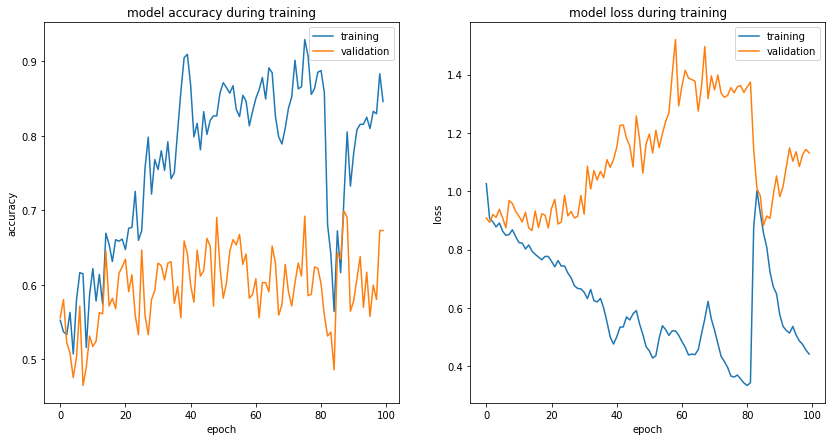

In [6]:
s_net_hani_batchnorm = Siamese()
s_net_hani_batchnorm.build('hani', batchnorm=True, loss='binary_crossentropy')
print("Hani Model with batch normalizationד:")
s_net_hani_batchnorm.model.summary()

history_hani_batchnorm = try_train(s_net_hani_batchnorm)
if history_hani_batchnorm:
    s_net_hani_batchnorm.evaluate(history_hani_batchnorm, same_test_paths, diff_test_paths)

# Using Hani with constrastive loss (with the best from the above)

<function contrastive_loss at 0x000001DD4C69FEA0>
Hani Model with ReLU and constastive loss and batchnormalization:
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 250, 250, 1)  0                                            
__________________________________________________________________________________________________
input_12 (InputLayer)           (None, 250, 250, 1)  0                                            
__________________________________________________________________________________________________
sequential_6 (Sequential)       (None, 40)           73099       input_11[0][0]                   
                                                                 input_12[0][0]                   
____________________________________________________________________________________________

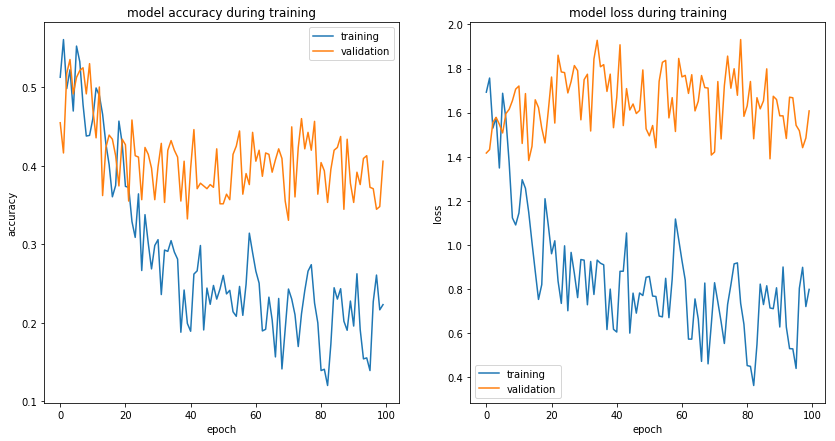

In [7]:
s_net_constrastive = Siamese()
s_net_constrastive.build('hani', act='relu')
print("Hani Model with ReLU and constastive loss and batchnormalization:")
s_net_constrastive.model.summary()

history_constrastive = try_train(s_net_constrastive)
if history_constrastive:
    s_net_constrastive.evaluate(history_constrastive, same_test_paths, diff_test_paths)